import library.
torch for create NN
pandas for read data
matplotlib for plot 

In [2]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
# download zip file from github
!wget https://raw.githubusercontent.com/Abtinmy/CS-SBU-NeuralNetwork/main/assignments/Assignment%202/Dataset.zip

--2025-01-26 13:46:39--  https://raw.githubusercontent.com/Abtinmy/CS-SBU-NeuralNetwork/main/assignments/Assignment%202/Dataset.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 66764119 (64M) [application/zip]
Saving to: ‘Dataset.zip’

Dataset.zip         100%[===================>]  63.67M   280KB/s    in 3m 51s  

2025-01-26 13:50:33 (283 KB/s) - ‘Dataset.zip’ saved [66764119/66764119]



In [4]:
# create folder
!mkdir dataset

In [6]:
!mkdir dataset/


mkdir: cannot create directory ‘dataset/’: File exists


In [9]:
# unzip data
!unzip ./Dataset.zip -d ./dataset

Archive:  ./Dataset.zip
  inflating: ./dataset/mnist_middle_columns/57653.jpg  
  inflating: ./dataset/mnist_middle_columns/15084.jpg  
  inflating: ./dataset/mnist_middle_columns/31552.csv  
  inflating: ./dataset/mnist_middle_columns/5523.jpg  
  inflating: ./dataset/mnist_middle_columns/26215.csv  
  inflating: ./dataset/mnist_middle_columns/52963.csv  
  inflating: ./dataset/mnist_middle_columns/14648.csv  
  inflating: ./dataset/mnist_middle_columns/52473.csv  
  inflating: ./dataset/mnist_middle_columns/38202.jpg  
  inflating: ./dataset/mnist_middle_columns/10074.jpg  
  inflating: ./dataset/mnist_middle_columns/41383.jpg  
  inflating: ./dataset/mnist_middle_columns/58552.csv  
  inflating: ./dataset/mnist_middle_columns/21980.jpg  
  inflating: ./dataset/mnist_middle_columns/270.csv  
  inflating: ./dataset/mnist_middle_columns/52672.jpg  
  inflating: ./dataset/mnist_middle_columns/24228.csv  
  inflating: ./dataset/mnist_middle_columns/55831.jpg  
  inflating: ./dataset/mnis

In [13]:
# get list path of all images path with jpg format
import glob
paths = glob.glob('./dataset/mnist_middle_columns/*.jpg')
# first path
paths[2]

'./dataset/mnist_middle_columns/49134.jpg'

In [14]:
paths

['./dataset/mnist_middle_columns/31911.jpg',
 './dataset/mnist_middle_columns/20530.jpg',
 './dataset/mnist_middle_columns/49134.jpg',
 './dataset/mnist_middle_columns/44861.jpg',
 './dataset/mnist_middle_columns/15486.jpg',
 './dataset/mnist_middle_columns/32481.jpg',
 './dataset/mnist_middle_columns/58605.jpg',
 './dataset/mnist_middle_columns/20682.jpg',
 './dataset/mnist_middle_columns/54834.jpg',
 './dataset/mnist_middle_columns/35012.jpg',
 './dataset/mnist_middle_columns/20947.jpg',
 './dataset/mnist_middle_columns/50531.jpg',
 './dataset/mnist_middle_columns/22230.jpg',
 './dataset/mnist_middle_columns/52103.jpg',
 './dataset/mnist_middle_columns/53459.jpg',
 './dataset/mnist_middle_columns/30169.jpg',
 './dataset/mnist_middle_columns/52093.jpg',
 './dataset/mnist_middle_columns/17470.jpg',
 './dataset/mnist_middle_columns/51612.jpg',
 './dataset/mnist_middle_columns/1701.jpg',
 './dataset/mnist_middle_columns/44009.jpg',
 './dataset/mnist_middle_columns/57952.jpg',
 './dataset

In [15]:
type(paths)

list

In [16]:
len(paths)

60000

In [17]:
# split images to train and test
split_size = 0.8
train_size = int(split_size * len(paths))
train_paths = paths[:train_size]
test_paths = paths[train_size:]
print(f'train size : {len(train_paths)}, test size : {len(test_paths)}')

train size : 48000, test size : 12000


In [18]:
# we simulate all process for one image then build Custom Dataset
from PIL import Image
import numpy as np

image = Image.open(train_paths[0])
image_array = np.array(image)
print(image_array.shape)

(28, 28, 3)


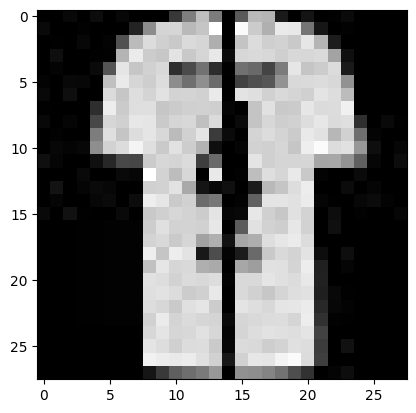

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(image_array)

In [ ]:
# check channel and it show that image is gray image and not RGB image
# then we can use only one channel
(image_array[:,:,0].all() == image_array[:,:,1].all() == image_array[:,:,2].all()).all()

True

In [ ]:
image_array = image_array[:,:,0]
image_array.shape

(28, 28)

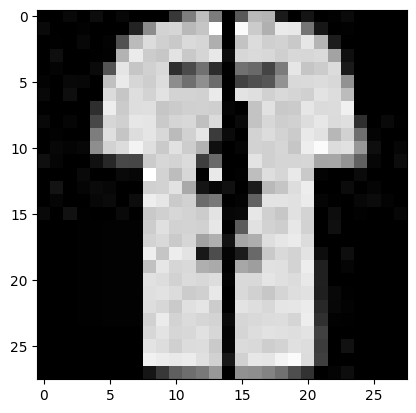

In [ ]:
plt.imshow(image_array, cmap='gray')

In [ ]:
paths[0]

'/content/dataset/mnist_middle_columns/8977.jpg'

In [ ]:
csv_path = paths[0].replace('.jpg','.csv')
csv_path

'/content/dataset/mnist_middle_columns/8977.csv'

In [ ]:
df = pd.read_csv(csv_path)
df.head()

0
0  0.262745
1  0.968627
2  0.772549
3  0.847059
4  0.474510

In [ ]:
df['0'].values

array([0.2627451 , 0.96862745, 0.77254903, 0.84705883, 0.4745098 ,
       0.2627451 , 0.87058824, 0.25882354, 0.        , 0.        ,
       0.5019608 , 0.8039216 , 0.6862745 , 0.        , 0.2509804 ,
       0.6431373 , 0.70980394, 0.73333335, 0.26666668, 0.654902  ,
       0.8509804 , 0.80784315, 0.84313726, 0.84705883, 0.85490197,
       0.84313726, 0.8862745 , 0.5294118 ])

In [ ]:
len(df['0'].values)

28

In [ ]:
from torch.utils.data import Dataset
class CustomImageDataset(Dataset):
    def __init__(self, image_paths):
        self.image_paths = image_paths

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        image = Image.open(image_path)
        image_array = np.array(image)
        image_array = image_array[:,:,0]
        image_array = image_array/255 #convert pixcel values between 0 and 1
        csv_path = paths[0].replace('.jpg','.csv')
        df = pd.read_csv(csv_path)
        target = df['0'].values
        target = torch.tensor(target)


        # flatten 2d image to 1d array
        features = image_array.reshape(28*28)
        features = torch.tensor(features , dtype=torch.float32)
        return features, target

In [ ]:
# build dataset
train_dataset = CustomImageDataset(train_paths)
test_dateset = CustomImageDataset(test_paths)

In [ ]:
# build dataloader

from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_dataset, batch_size=256, shuffle=True)
test_dataloader = DataLoader(test_dateset, batch_size=256, shuffle=True)

In [ ]:
for i_batch, sample_batched in enumerate(train_dataloader):
    if i_batch == 0:
        print(sample_batched[0].shape)
        print(sample_batched[0])
        print(sample_batched[1].shape)
        print(sample_batched[1])
    else:
        break

torch.Size([256, 784])
tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0627, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0039],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]])
torch.Size([256, 28])
tensor([[0.2627, 0.9686, 0.7725,  ..., 0.8431, 0.8863, 0.5294],
        [0.2627, 0.9686, 0.7725,  ..., 0.8431, 0.8863, 0.5294],
        [0.2627, 0.9686, 0.7725,  ..., 0.8431, 0.8863, 0.5294],
        ...,
        [0.2627, 0.9686, 0.7725,  ..., 0.8431, 0.8863, 0.5294],
        [0.2627, 0.9686, 0.7725,  ..., 0.8431, 0.8863, 0.5294],
        [0.2627, 0.9686, 0.7725,  ..., 0.8431, 0.8863, 0.5294]],
       dtype=torch.float64)


In [ ]:
import numpy as np
import math
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import datasets
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torch.utils.data import random_split


In [ ]:
import torch.nn as nn
class Net(nn.Module):

    def __init__(self ,x,v,b):
        super().__init__()
        # for i in range(x1):

        self.linear1 = nn.Linear(784, x)
        self.act_f1 = nn.ReLU()
        self.linear2 = nn.Linear(x, v)

        self.linear3 = nn.Linear(v, b)

        self.linear4 = nn.Linear(b, 28)


    def forward(self, x):

        output = x.view(-1,784)

        output = self.linear1(output)

        output = self.act_f1(output)

        output = self.linear2(output)

        output = self.act_f1(output)

        output = self.linear3(output)

        output = self.act_f1(output)

        output = self.linear4(output)


        return output

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
Model = Net(1000,900,700).to(device)
criterion =  nn.L1Loss()
optimizer = torch.optim.SGD(Model.parameters(), lr = 0.001)

In [ ]:
loss1train = []

loss2valid = []
n_total_steps = len(train_dataloader)
print(n_total_steps)
Model.train()
for epoch in range(10):
  for i, (images, labels) in enumerate(train_dataloader):

    images = images.to(device)
    labels = labels.to(device)
# Forward pass
    outputs = Model(images).to(device)
    loss = criterion(outputs, labels)
    loss1train.append(loss.item())
# Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1) % n_total_steps == 0:
      print(str(epoch+1) + " epoch loss is " + str(loss.item()))
      # clear_output()
      with torch.no_grad():

         for j, (images, labels) in enumerate(test_dataloader):
              images = images.to(device)
              labels = labels.to(device)
              outputs = Model(images).to(device)
              loss = criterion(outputs, labels)
              loss2valid.append(loss.item())
              if (j+1) % len(test_dataloader) ==0:
                  print('result loss in test set is ' + str(loss.item()) )

print('Finished Training')

188
1 epoch loss is 0.575297026030955
result loss in test set is 0.5756316665093523
2 epoch loss is 0.5589993512901771
result loss in test set is 0.5581523411891937
3 epoch loss is 0.5394395718355567
result loss in test set is 0.5402040607343144
4 epoch loss is 0.5204770941159573
result loss in test set is 0.5208666757860401
5 epoch loss is 0.49536959120566537
result loss in test set is 0.4920617548040032
6 epoch loss is 0.4689483061566807
result loss in test set is 0.4606770754571998
7 epoch loss is 0.41567311308678595
result loss in test set is 0.41000245593670787
8 epoch loss is 0.35309280305480883
result loss in test set is 0.3503136931056029
9 epoch loss is 0.2666958879231678
result loss in test set is 0.26038752064354165
10 epoch loss is 0.19336828112818283
result loss in test set is 0.19077196522360243
Finished Training


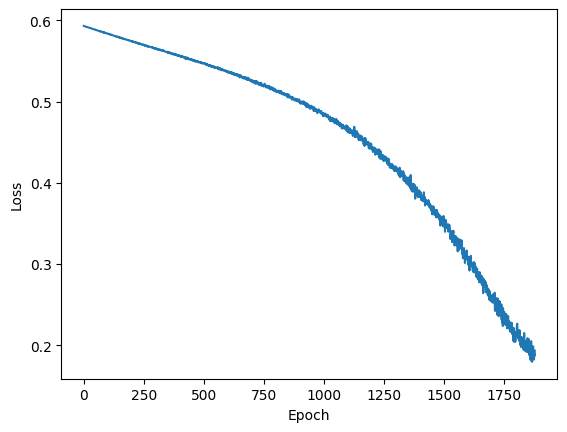

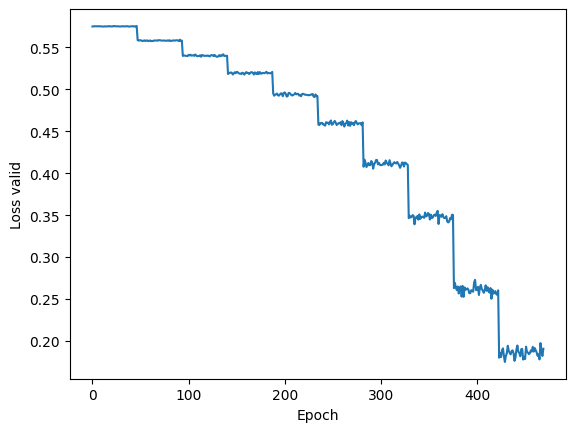

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import image as mpimg
plt.plot(loss1train)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()
plt.plot(loss2valid)
plt.xlabel("Epoch")
plt.ylabel("Loss valid")
plt.show()

In [ ]:
#تغییر مقدار لزنینگ ریت
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
Model = Net(1000,900,700).to(device)
criterion =  nn.L1Loss()
optimizer = torch.optim.SGD(Model.parameters(), lr = 0.5)

In [ ]:
loss1train = []

loss2valid = []
n_total_steps = len(train_dataloader)
print(n_total_steps)
Model.train()
for epoch in range(10):
  for i, (images, labels) in enumerate(train_dataloader):

    images = images.to(device)
    labels = labels.to(device)
# Forward pass
    outputs = Model(images).to(device)
    loss = criterion(outputs, labels)
    loss1train.append(loss.item())
# Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1) % n_total_steps == 0:
      print(str(epoch+1) + " epoch loss is " + str(loss.item()))
      # clear_output()
      with torch.no_grad():

         for j, (images, labels) in enumerate(test_dataloader):
              images = images.to(device)
              labels = labels.to(device)
              outputs = Model(images).to(device)
              loss = criterion(outputs, labels)
              loss2valid.append(loss.item())
              if (j+1) % len(test_dataloader) ==0:
                  print('result loss in test set is ' + str(loss.item()) )

print('Finished Training')

188
1 epoch loss is 0.040901663006816996
result loss in test set is 0.011205794908237383
2 epoch loss is 0.03170120956871939
result loss in test set is 0.0040850423082832215
3 epoch loss is 0.022010166561555394
result loss in test set is 0.00448380089113783
4 epoch loss is 0.01626244523966766
result loss in test set is 0.005500018088805441
5 epoch loss is 0.013469372586534526
result loss in test set is 0.00611693376143245
6 epoch loss is 0.011874783752496862
result loss in test set is 0.006891770033569961
7 epoch loss is 0.01088166274207369
result loss in test set is 0.007466435927584841
8 epoch loss is 0.010355479223313927
result loss in test set is 0.007740840358274358
9 epoch loss is 0.010292484773730218
result loss in test set is 0.007653528522211973
10 epoch loss is 0.010278143459639172
result loss in test set is 0.007644136400997165
Finished Training


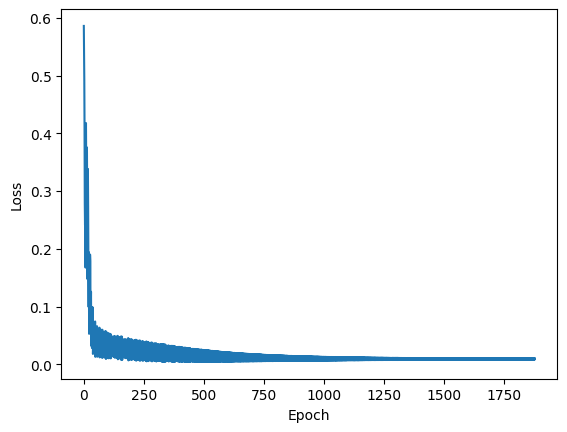

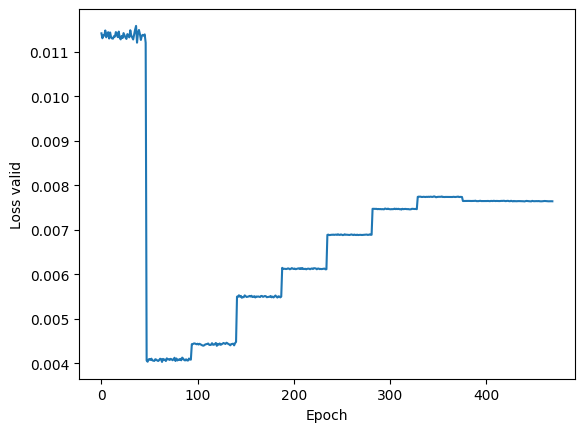

In [ ]:

plt.plot(loss1train)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()
plt.plot(loss2valid)
plt.xlabel("Epoch")
plt.ylabel("Loss valid")
plt.show()

In [ ]:
#تغییر بهینه سازت
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
Model = Net(1000,900,700).to(device)
criterion =  nn.L1Loss()
optimizer = torch.optim.Adam(Model.parameters(), lr = 0.001)

In [ ]:
loss1train = []

loss2valid = []
n_total_steps = len(train_dataloader)
print(n_total_steps)
Model.train()
for epoch in range(10):
  for i, (images, labels) in enumerate(train_dataloader):

    images = images.to(device)
    labels = labels.to(device)
# Forward pass
    outputs = Model(images).to(device)
    loss = criterion(outputs, labels)
    loss1train.append(loss.item())
# Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1) % n_total_steps == 0:
      print(str(epoch+1) + " epoch loss is " + str(loss.item()))
      # clear_output()
      with torch.no_grad():

         for j, (images, labels) in enumerate(test_dataloader):
              images = images.to(device)
              labels = labels.to(device)
              outputs = Model(images).to(device)
              loss = criterion(outputs, labels)
              loss2valid.append(loss.item())
              if (j+1) % len(test_dataloader) ==0:
                  print('result loss in test set is ' + str(loss.item()) )

print('Finished Training')

188
1 epoch loss is 0.00658417035213635
result loss in test set is 0.00839786241588012
2 epoch loss is 0.007483744594792601
result loss in test set is 0.006438000415365061
3 epoch loss is 0.004414483701203071
result loss in test set is 0.00552821299688501
4 epoch loss is 0.006848051053913377
result loss in test set is 0.006205933843027727
5 epoch loss is 0.004694640327335225
result loss in test set is 0.006158111850453038
6 epoch loss is 0.005253842364571195
result loss in test set is 0.005944118166671396
7 epoch loss is 0.0072530426983797355
result loss in test set is 0.006983928448559415
8 epoch loss is 0.00454431705039427
result loss in test set is 0.003930977677112214
9 epoch loss is 0.004319603200147212
result loss in test set is 0.003777700455025994
10 epoch loss is 0.004065397493720921
result loss in test set is 0.00470604307029475
Finished Training


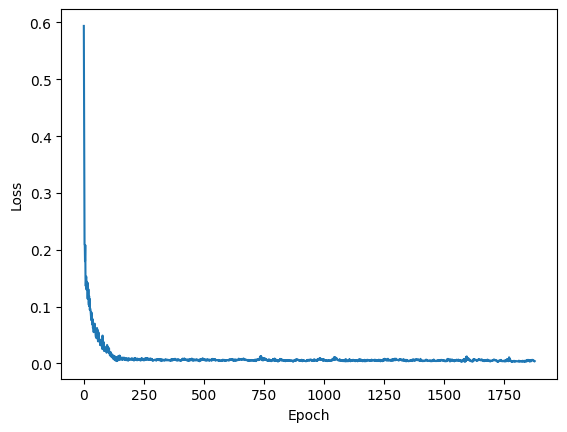

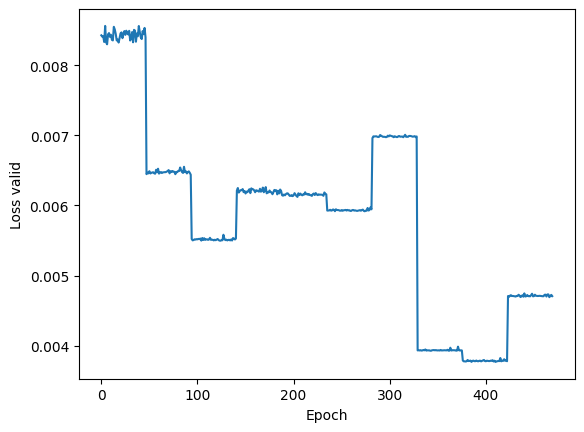

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import image as mpimg
plt.plot(loss1train)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()
plt.plot(loss2valid)
plt.xlabel("Epoch")
plt.ylabel("Loss valid")
plt.show()

In [ ]:
#در اوت
import torch.nn as nn
class Netdropout(nn.Module):

    def __init__(self ,x,v,b):
        super().__init__()
        # for i in range(x1):

        self.linear1 = nn.Linear(784, x)
        self.act_f1 = nn.ReLU()
        self.linear2 = nn.Linear(x, v)
        self.D0=nn.Dropout(0.7)
        self.linear3 = nn.Linear(v, b)

        self.linear4 = nn.Linear(b, 28)


    def forward(self, x):

        output = x.view(-1,784)


        output = self.linear1(output)



        output = self.act_f1(output)

        output = self.D0(output)

        output = self.linear2(output)

        output = self.act_f1(output)

        output = self.D0(output)

        output = self.linear3(output)

        output = self.act_f1(output)

        output = self.D0(output)

        output = self.linear4(output)


        return output

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
Model = Netdropout(1000,900,700).to(device)
criterion =  nn.L1Loss()
optimizer = torch.optim.SGD(Model.parameters(), lr = 0.001)

In [ ]:
loss1train = []

loss2valid = []
n_total_steps = len(train_dataloader)
print(n_total_steps)
Model.train()
for epoch in range(10):
  for i, (images, labels) in enumerate(train_dataloader):

    images = images.to(device)
    labels = labels.to(device)
# Forward pass
    outputs = Model(images).to(device)
    loss = criterion(outputs, labels)
    loss1train.append(loss.item())
# Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1) % n_total_steps == 0:
      print(str(epoch+1) + " epoch loss is " + str(loss.item()))
      # clear_output()
      with torch.no_grad():

         for j, (images, labels) in enumerate(test_dataloader):
              images = images.to(device)
              labels = labels.to(device)
              outputs = Model(images).to(device)
              loss = criterion(outputs, labels)
              loss2valid.append(loss.item())
              if (j+1) % len(test_dataloader) ==0:
                  print('result loss in test set is ' + str(loss.item()) )

print('Finished Training')

188
1 epoch loss is 0.5684594095537782
result loss in test set is 0.5678441420650686
2 epoch loss is 0.5394577516059783
result loss in test set is 0.5429363700227613
3 epoch loss is 0.5131900369347842
result loss in test set is 0.5150695447671606
4 epoch loss is 0.4778441987313649
result loss in test set is 0.47594622517331625
5 epoch loss is 0.43844064615856515
result loss in test set is 0.4424204939620764
6 epoch loss is 0.4035321552881408
result loss in test set is 0.39661145845232365
7 epoch loss is 0.351536831898017
result loss in test set is 0.347542002292778
8 epoch loss is 0.30461682196842316
result loss in test set is 0.30347413943208823
9 epoch loss is 0.2690139803731482
result loss in test set is 0.26037849386778755
10 epoch loss is 0.23658885172718444
result loss in test set is 0.24827354371053337
Finished Training


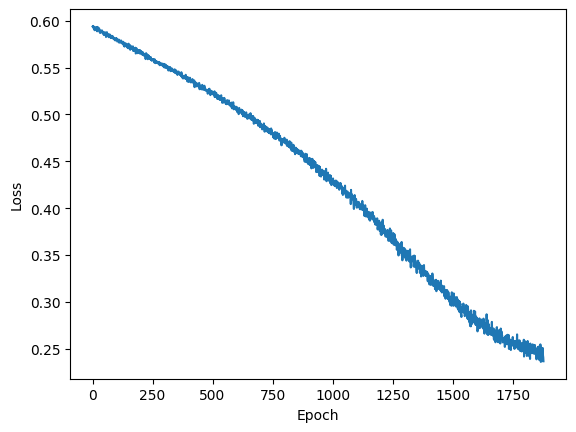

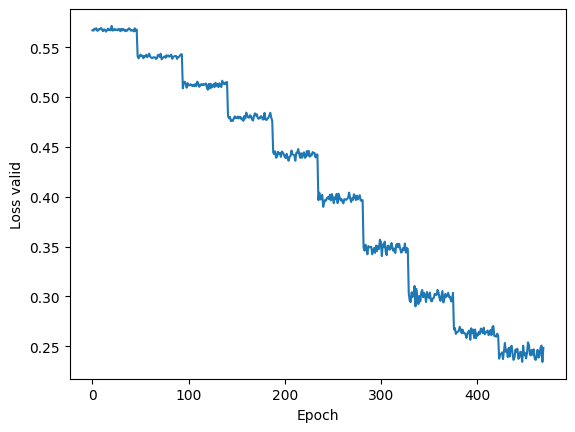

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import image as mpimg
plt.plot(loss1train)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()
plt.plot(loss2valid)
plt.xlabel("Epoch")
plt.ylabel("Loss valid")
plt.show()

In [ ]:
import torch.nn as nn
class Netactivechange(nn.Module):

    def __init__(self ,x,v,b):
        super().__init__()
        # for i in range(x1):

        self.linear1 = nn.Linear(784, x)
        self.act_f1 = nn.Tanh()
        self.linear2 = nn.Linear(x, v)

        self.linear3 = nn.Linear(v, b)

        self.linear4 = nn.Linear(b, 28)


    def forward(self, x):

        output = x.view(-1,784)

        output = self.linear1(output)

        output = self.act_f1(output)

        output = self.linear2(output)

        output = self.act_f1(output)

        output = self.linear3(output)

        output = self.act_f1(output)

        output = self.linear4(output)


        return output

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
Model = Netactivechange(1000,900,700).to(device)
criterion =  nn.L1Loss()
optimizer = torch.optim.SGD(Model.parameters(), lr = 0.001)

In [ ]:
loss1train = []

loss2valid = []
n_total_steps = len(train_dataloader)
print(n_total_steps)
Model.train()
for epoch in range(10):
  for i, (images, labels) in enumerate(train_dataloader):

    images = images.to(device)
    labels = labels.to(device)
# Forward pass
    outputs = Model(images).to(device)
    loss = criterion(outputs, labels)
    # loss = torch.tensor(loss , dtype = torch.float32)

    loss1train.append(loss.item())
# Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1) % n_total_steps == 0:
      print(str(epoch+1) + " epoch loss is " + str(loss.item()))
      # clear_output()
      with torch.no_grad():

         for j, (images, labels) in enumerate(test_dataloader):
              images = images.to(device)
              labels = labels.to(device)
              outputs = Model(images).to(device)
              loss = criterion(outputs, labels)
              loss2valid.append(loss.item())
              if (j+1) % len(test_dataloader) ==0:
                  print('result loss in test set is ' + str(loss.item()) )

print('Finished Training')

188
1 epoch loss is 0.5031363334346972
result loss in test set is 0.5013390724983057
2 epoch loss is 0.4147385636384153
result loss in test set is 0.4039400758870753
3 epoch loss is 0.28101227031687454
result loss in test set is 0.281304265656864
4 epoch loss is 0.15728698334428357
result loss in test set is 0.18120432865804928
5 epoch loss is 0.1418502730073612
result loss in test set is 0.12658865116630627
6 epoch loss is 0.13586162558007625
result loss in test set is 0.12529426507892374
7 epoch loss is 0.13296383248338375
result loss in test set is 0.13478909407523507
8 epoch loss is 0.12509020394019701
result loss in test set is 0.12517015370031834
9 epoch loss is 0.1242781335991816
result loss in test set is 0.13095016309684937
10 epoch loss is 0.1174315213501981
result loss in test set is 0.1154988759477762
Finished Training


torch.Size([1000, 784])
torch.Size([1000])
torch.Size([900, 1000])
torch.Size([900])
torch.Size([700, 900])
torch.Size([700])
torch.Size([28, 700])
torch.Size([28])


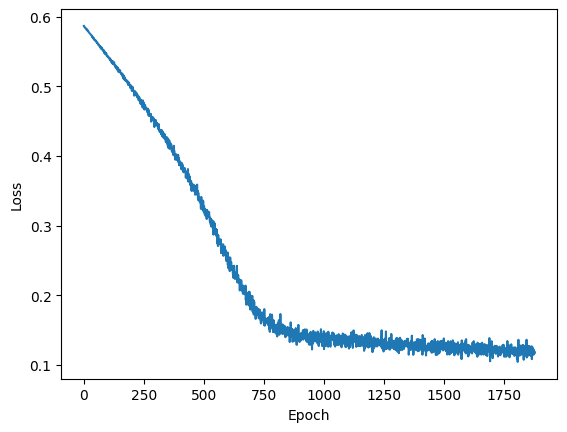

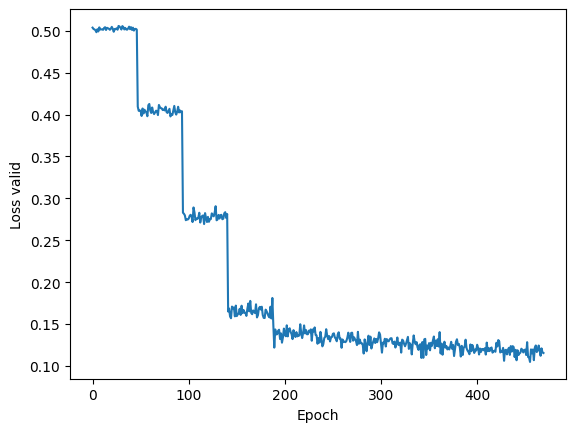

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import image as mpimg
plt.plot(loss1train)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()
plt.plot(loss2valid)
plt.xlabel("Epoch")
plt.ylabel("Loss valid")
plt.show()

In [ ]:
import torch.nn as nn
class Net(nn.Module):

    def __init__(self ,x,v,b):
        super().__init__()
        # for i in range(x1):

        self.linear1 = nn.Linear(784, x)
        self.act_f1 = nn.ReLU()
        self.linear2 = nn.Linear(x, v)

        self.linear3 = nn.Linear(v, b)

        self.linear4 = nn.Linear(b, 28)


    def forward(self, x):

        output = x.view(-1,784)

        output = self.linear1(output)

        output = self.act_f1(output)

        output = self.linear2(output)

        output = self.act_f1(output)

        output = self.linear3(output)

        output = self.act_f1(output)

        output = self.linear4(output)


        return output

In [ ]:
model = Net(1000,900,700)
criterion = nn.L1Loss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)

In [ ]:
#منظم ساز
loss1train = []

loss2valid = []
n_total_steps = len(train_dataloader)
print(n_total_steps)
Model.train()
for epoch in range(10):
  for i, (images, labels) in enumerate(train_dataloader):

    images = images.to(device)
    labels = labels.to(device)
# Forward pass
    outputs = Model(images).to(device)
    loss = criterion(outputs, labels)
    loss1train.append(loss.item())
    l2_lambda = 0.01
    l2_reg = torch.tensor(0.)

    for param in model.parameters():
        l2_reg += torch.norm(param)

    loss += l2_lambda * l2_reg
    loss = criterion(outputs, labels)

# Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1) % n_total_steps == 0:
      print(str(epoch+1) + " epoch loss is " + str(loss.item()))
      # clear_output()
      with torch.no_grad():

         for j, (images, labels) in enumerate(test_dataloader):
              images = images.to(device)
              labels = labels.to(device)
              outputs = Model(images).to(device)
              loss = criterion(outputs, labels)
              loss2valid.append(loss.item())
              if (j+1) % len(test_dataloader) ==0:
                  print('result loss in test set is ' + str(loss.item()) )

print('Finished Training')

188
1 epoch loss is 0.11737244088921091
result loss in test set is 0.11716317109628235
2 epoch loss is 0.12163031830394684
result loss in test set is 0.10738505507152477
3 epoch loss is 0.1168394000481046
result loss in test set is 0.11673351347632106
4 epoch loss is 0.11565554983922247
result loss in test set is 0.12119920079565495
5 epoch loss is 0.11899895003130695
result loss in test set is 0.12257166683167932
6 epoch loss is 0.11318184354426812
result loss in test set is 0.10974024905961681
7 epoch loss is 0.10384839056175456
result loss in test set is 0.11783619857034179
8 epoch loss is 0.11061468842751156
result loss in test set is 0.11073885013058674
9 epoch loss is 0.1266115939999469
result loss in test set is 0.11617528392281057
10 epoch loss is 0.1193163868947646
result loss in test set is 0.11662433193319767
Finished Training


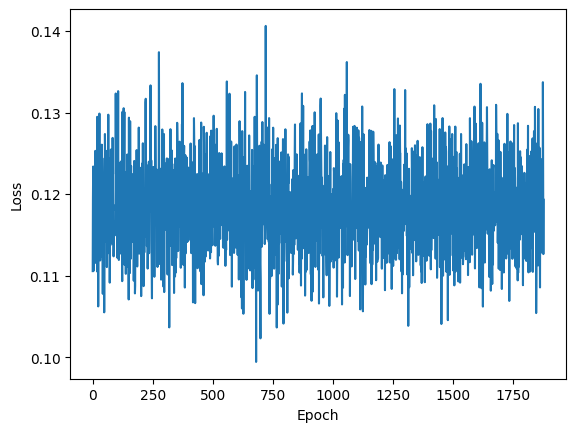

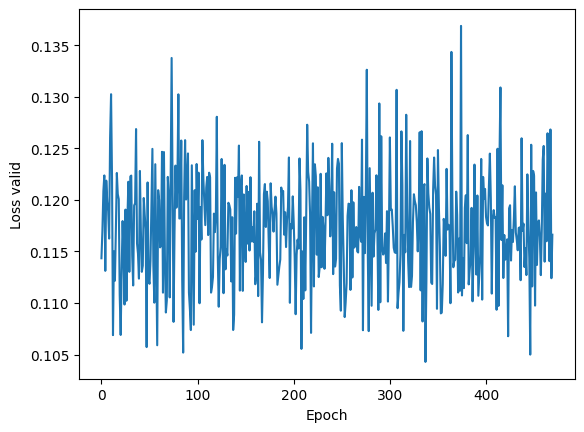

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import image as mpimg
plt.plot(loss1train)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()
plt.plot(loss2valid)
plt.xlabel("Epoch")
plt.ylabel("Loss valid")
plt.show()

In [ ]:
!pip install pytorchtools
import pytorchtools
# from pytorchtools import EarlyStopping
model.to(device)
n_total_steps = len(train_dataloader)
print(n_total_steps)
model.train()
for epoch in range(10):
  for i, (images, labels) in enumerate(train_dataloader):
    images = images.to(device)
    labels = labels.to(device)
# Forward pass
    outputs = model(images).to(device)
    loss = criterion(outputs, labels)
# Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    pytorchtools.early_stopping(loss, model)
    if pytorchtools.early_stopping.early_stop:
      print("Early stopping")
      break
    optimizer.step()
    if (i+1) % n_total_steps == 0:
      print(str(epoch+1) + " epoch loss is" + str(loss.item()))
      # clear_output()
print('Finished Training')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
188


AttributeError: ignored

In [ ]:
import torch.nn as nn
class Net(nn.Module):

    def __init__(self ,x,v,b):
        super().__init__()
        # for i in range(x1):

        self.linear1 = nn.Linear(784, x)
        self.act_f1 = nn.ReLU()
        self.linear2 = nn.Linear(x, v)

        self.linear3 = nn.Linear(v, b)

        self.linear4 = nn.Linear(b, 28)


    def forward(self, x):

        output = x.view(-1,784)

        output = self.linear1(output)

        output = self.act_f1(output)

        output = self.linear2(output)

        output = self.act_f1(output)

        output = self.linear3(output)

        output = self.act_f1(output)

        output = self.linear4(output)


        return output

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
Model = Net(1000,900,700).to(device)
criterion =  nn.L1Loss()
optimizer = torch.optim.SGD(Model.parameters(), lr = 0.001)

In [ ]:
#تغییر وزن اولیه
i=0
for name, param in Model.named_parameters():
  i+=1
  if i%2 == 1:
    if i==1:
      print(param.shape)
      param.data=(torch.randn(1000, 784))
      print(param.shape)
    if i==3:
     param.data=(torch.randn(900, 1000))
    if i == 5 :
      param.data=(torch.randn(700, 900))
    if i== 7:
     param.data=(torch.randn(28, 700))

torch.Size([1000, 784])
torch.Size([1000, 784])


In [ ]:
loss1train = []
Model.to(device)
loss2valid = []
n_total_steps = len(train_dataloader)
print(n_total_steps)
Model.train()
for epoch in range(10):
  for i, (images, labels) in enumerate(train_dataloader):

    images = images.to(device)
    labels = labels.to(device)
# Forward pass
    outputs = Model(images).to(device)
    loss = criterion(outputs, labels)
    # loss = torch.tensor(loss , dtype = torch.float32)

    loss1train.append(loss.item())
# Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1) % n_total_steps == 0:
      print(str(epoch+1) + " epoch loss is " + str(loss.item()))
      # clear_output()
      with torch.no_grad():

         for j, (images, labels) in enumerate(test_dataloader):
              images = images.to(device)
              labels = labels.to(device)
              outputs = Model(images).to(device)
              loss = criterion(outputs, labels)
              loss2valid.append(loss.item())
              if (j+1) % len(test_dataloader) ==0:
                  print('result loss in test set is ' + str(loss.item()) )

print('Finished Training')

188
1 epoch loss is 76.01050043116099
result loss in test set is 76.24138460278417
2 epoch loss is 15.714784237859257
result loss in test set is 24.88744286050601
3 epoch loss is 9.717602288098865
result loss in test set is 12.886580345671588
4 epoch loss is 1.2129190998757966
result loss in test set is 12.401460309614118
5 epoch loss is 6.7582079872662515
result loss in test set is 3.942708394562399
6 epoch loss is 1.688582493456774
result loss in test set is 2.9604358253973304
7 epoch loss is 4.412862820924996
result loss in test set is 2.288794387916162
8 epoch loss is 0.5386428209529588
result loss in test set is 2.4623618636493156
9 epoch loss is 18.701954298019007
result loss in test set is 10.58819629008763
10 epoch loss is 0.5267324727597575
result loss in test set is 1.0888502292386009
Finished Training


In [ ]:
from google.colab import auth
from oauth2client.client import GoogleCredentials
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
import polars as pl
id = "1q-BOwPiymbN93qdJhLMMT2Q50jigU0YN"
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('drug_smiles.csv')
file2path = "/content/drug_smiles.csv"
df2 = pl.scan_csv(file2path, ignore_errors=True)
df2.head(10).collect()

shape: (10, 2)
┌─────────────────────────────┬───────────────────────────────────┐
│ Drug Bank Names             ┆ SMILES                            │
│ ---                         ┆ ---                               │
│ str                         ┆ str                               │
╞═════════════════════════════╪═══════════════════════════════════╡
│ Copper                      ┆ [Cu]                              │
│ Oxygen                      ┆ O=O                               │
│ Flunisolide                 ┆ CC1(OC2CC3C4CC(C5=CC(=O)C=CC5(C4… │
│ Alclometasone               ┆ CC1CC2C3C(CC4=CC(=O)C=CC4(C3C(CC… │
│ …                           ┆ …                                 │
│ Beclomethasone dipropionate ┆ CCC(=O)OCC(=O)C1(C(CC2C1(CC(C3(C… │
│ Betamethasone               ┆ CC1CC2C3CCC4=CC(=O)C=CC4(C3(C(CC… │
│ Fluticasone propionate      ┆ CCC(=O)OC1(C(CC2C1(CC(C3(C2CC(C4… │
│ Fluocinolone acetonide      ┆ CC1(OC2CC3C4CC(C5=CC(=O)C=CC5(C4… │
└─────────────────────────────┴───────────────────────────────────┘

In [ ]:
drugdf1 = df2.filter("Error"== pl.col("SMILES")).collect()

In [ ]:
drugdf1

shape: (858, 2)
┌─────────────────────────────────┬────────┐
│ Drug Bank Names                 ┆ SMILES │
│ ---                             ┆ ---    │
│ str                             ┆ str    │
╞═════════════════════════════════╪════════╡
│ CRx-119                         ┆ Error  │
│ NRP409                          ┆ Error  │
│ Rose bengal                     ┆ Error  │
│ Hyaluronidase (ovine)           ┆ Error  │
│ …                               ┆ …      │
│ Calcitonin gene-related peptide ┆ Error  │
│ Dimethicone                     ┆ Error  │
│ Menaquinone                     ┆ Error  │
│ Protamine                       ┆ Error  │
└─────────────────────────────────┴────────┘